Importing Libaries

In [1]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

In [2]:
data=pd.read_csv("kidney_disease(new).csv")
data.head() 

,Unnamed: 0,id,age,bp,sg,al,su,rbc,pc,pcc,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,...,44.0,7800.0,NaN,yes,yes,no,good,no,no,ckd
1,1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,...,32.0,6700.0,NaN,yes,no,no,poor,yes,yes,ckd
4,4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,...,35.0,7300.0,NaN,no,no,no,good,no,no,ckd


In [3]:
data = data.drop('Unnamed: 0',axis=1)

In [4]:
data.columns=['id', 'age', 'Blood_pressure', 'specific_gravity', 'albumin', 'sugar','red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria','Blood glucose random', 'blood_urea', 'serum_creatinine', 'sodium','potassium', 'hemoglobin', 'packed_cell_volume','white_blood_cell_count', 'red_blood_cell_count', 'hypertension','diabetesmellitus', 'coronary_artery_disease', 'appetite','pedal_edema', 'anemia', 'class']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   Blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  Blood glucose random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [6]:
data.isnull().any()

id                         False
age                         True
Blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
Blood glucose random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [7]:
data['Blood glucose random'].fillna(data['Blood glucose random'].mean(), inplace=True)
data['Blood_pressure'].fillna(data['Blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True) 
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['potassium'].fillna(data['potassium'].mean(), inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)

In [8]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True) 
data ['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0], inplace=True)

In [9]:
catcols=set(data.dtypes[data.dtypes=='O'].index.values)
print(catcols)

{'hypertension', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'anemia', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'appetite', 'red_blood_cells'}


In [10]:
for i in catcols:
  print("Columns:",i)
  print(c(data[i]))
  print('*'*120+'\n')

Columns: hypertension
Counter({'no': 253, 'yes': 147})
************************************************************************************************************************

Columns: pedal_edema
Counter({'no': 324, 'yes': 76})
************************************************************************************************************************

Columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2})
************************************************************************************************************************

Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, ' yes': 1})
************************************************************************************************************************

Columns: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Columns: anemia
Counter({'no': 340, 'yes': 60})
*

In [11]:
# catcols.remove('red_blood_cell_count')
# catcols.remove('packed_cell_volume')
# catcols.remove('white_blood_cell_count')
print(catcols)

{'hypertension', 'pedal_edema', 'coronary_artery_disease', 'diabetesmellitus', 'class', 'anemia', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'appetite', 'red_blood_cells'}


In [12]:
catcols=['anemia', 'pedal_edema', 'appetite', 'bacteria', 'class', 'coronary_artery_disease', 'diabetesmellitus', 'hypertension', 'pus_cell', 'pus_cell_clumps', 'red_blood_cells']

In [13]:
from sklearn.preprocessing import LabelEncoder
for i in catcols:
  print("LABEL ENCONDING OF: ",i)
  LEi= LabelEncoder()
  print(c(data[i]))
  data[i] = LEi.fit_transform(data[i])
  print(c(data[i]))
  print("*"*100)


LABEL ENCONDING OF:  anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCONDING OF:  pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCONDING OF:  appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCONDING OF:  bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCONDING OF:  class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCONDING OF:  co

In [14]:
contcols = set(data.dtypes[data.dtypes!='O'].index.values)
print(contcols)

{'pedal_edema', 'class', 'id', 'sugar', 'bacteria', 'appetite', 'anemia', 'hemoglobin', 'potassium', 'sodium', 'blood_urea', 'specific_gravity', 'age', 'serum_creatinine', 'coronary_artery_disease', 'diabetesmellitus', 'packed_cell_volume', 'pus_cell', 'white_blood_cell_count', 'red_blood_cells', 'hypertension', 'red_blood_cell_count', 'albumin', 'pus_cell_clumps', 'Blood glucose random', 'Blood_pressure'}


Labeling Encoding of Categorical Column

In [15]:
for i in contcols:
  print("Continous Columns: ",i)
  print(c(data[i]))
  print("*"*120+'\n')

Continous Columns:  pedal_edema
Counter({0: 324, 1: 76})
************************************************************************************************************************

Continous Columns:  class
Counter({0: 248, 2: 150, 1: 2})
************************************************************************************************************************

Continous Columns:  id
Counter({0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88:

In [16]:
contcols.remove('specific_gravity')
contcols.remove('albumin')
contcols.remove('sugar')
print(contcols)

{'pedal_edema', 'class', 'id', 'bacteria', 'appetite', 'anemia', 'hemoglobin', 'potassium', 'sodium', 'blood_urea', 'age', 'serum_creatinine', 'coronary_artery_disease', 'diabetesmellitus', 'packed_cell_volume', 'pus_cell', 'white_blood_cell_count', 'red_blood_cells', 'hypertension', 'red_blood_cell_count', 'pus_cell_clumps', 'Blood glucose random', 'Blood_pressure'}


In [17]:
contcols.add('specific_gravity')
contcols.add('albumin')
contcols.add('sugar')
print(contcols)

{'pedal_edema', 'class', 'id', 'bacteria', 'appetite', 'anemia', 'sugar', 'hemoglobin', 'potassium', 'sodium', 'blood_urea', 'specific_gravity', 'age', 'serum_creatinine', 'coronary_artery_disease', 'diabetesmellitus', 'packed_cell_volume', 'pus_cell', 'white_blood_cell_count', 'red_blood_cells', 'hypertension', 'red_blood_cell_count', 'albumin', 'pus_cell_clumps', 'Blood glucose random', 'Blood_pressure'}


In [18]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({1: 364, 2: 34, 0: 2})

In [19]:
data['diabetesmellitus'] = data.diabetesmellitus.replace(to_replace={'\tno':'no','\tyes':'yes','yes':'yes'})
c(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

In [20]:
data.describe()

,id,age,Blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,8406.122449,4.166667,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,2523.219976,0.084268,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6975.000000,4.166667,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,8406.122449,4.166667,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9400.000000,4.166667,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,5.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


Age distribution

<ipython-input-21-868c85374ad7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age)


<Axes: xlabel='age', ylabel='Density'>

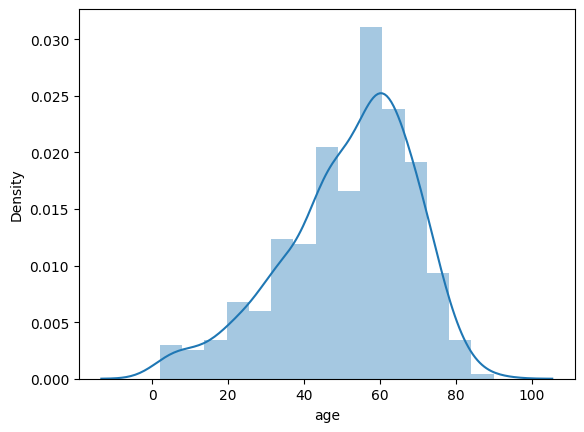

In [21]:
sns.distplot(data.age)

Age Vs Blood Pressure


Text(0.5, 1.0, 'age VS blood Scatter plot')

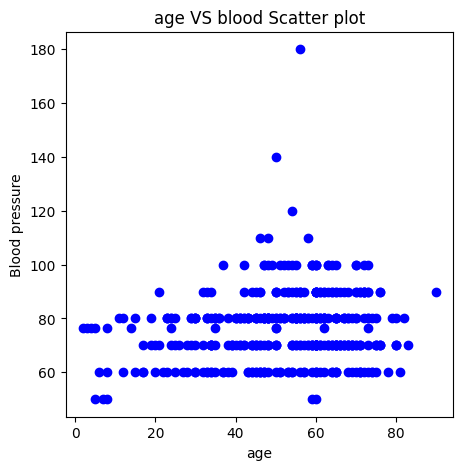

In [22]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['Blood_pressure'],color='blue')
plt.xlabel('age')
plt.ylabel('Blood pressure')
plt.title("age VS blood Scatter plot")

Age VS all continous columns

<function matplotlib.pyplot.show(close=None, block=None)>

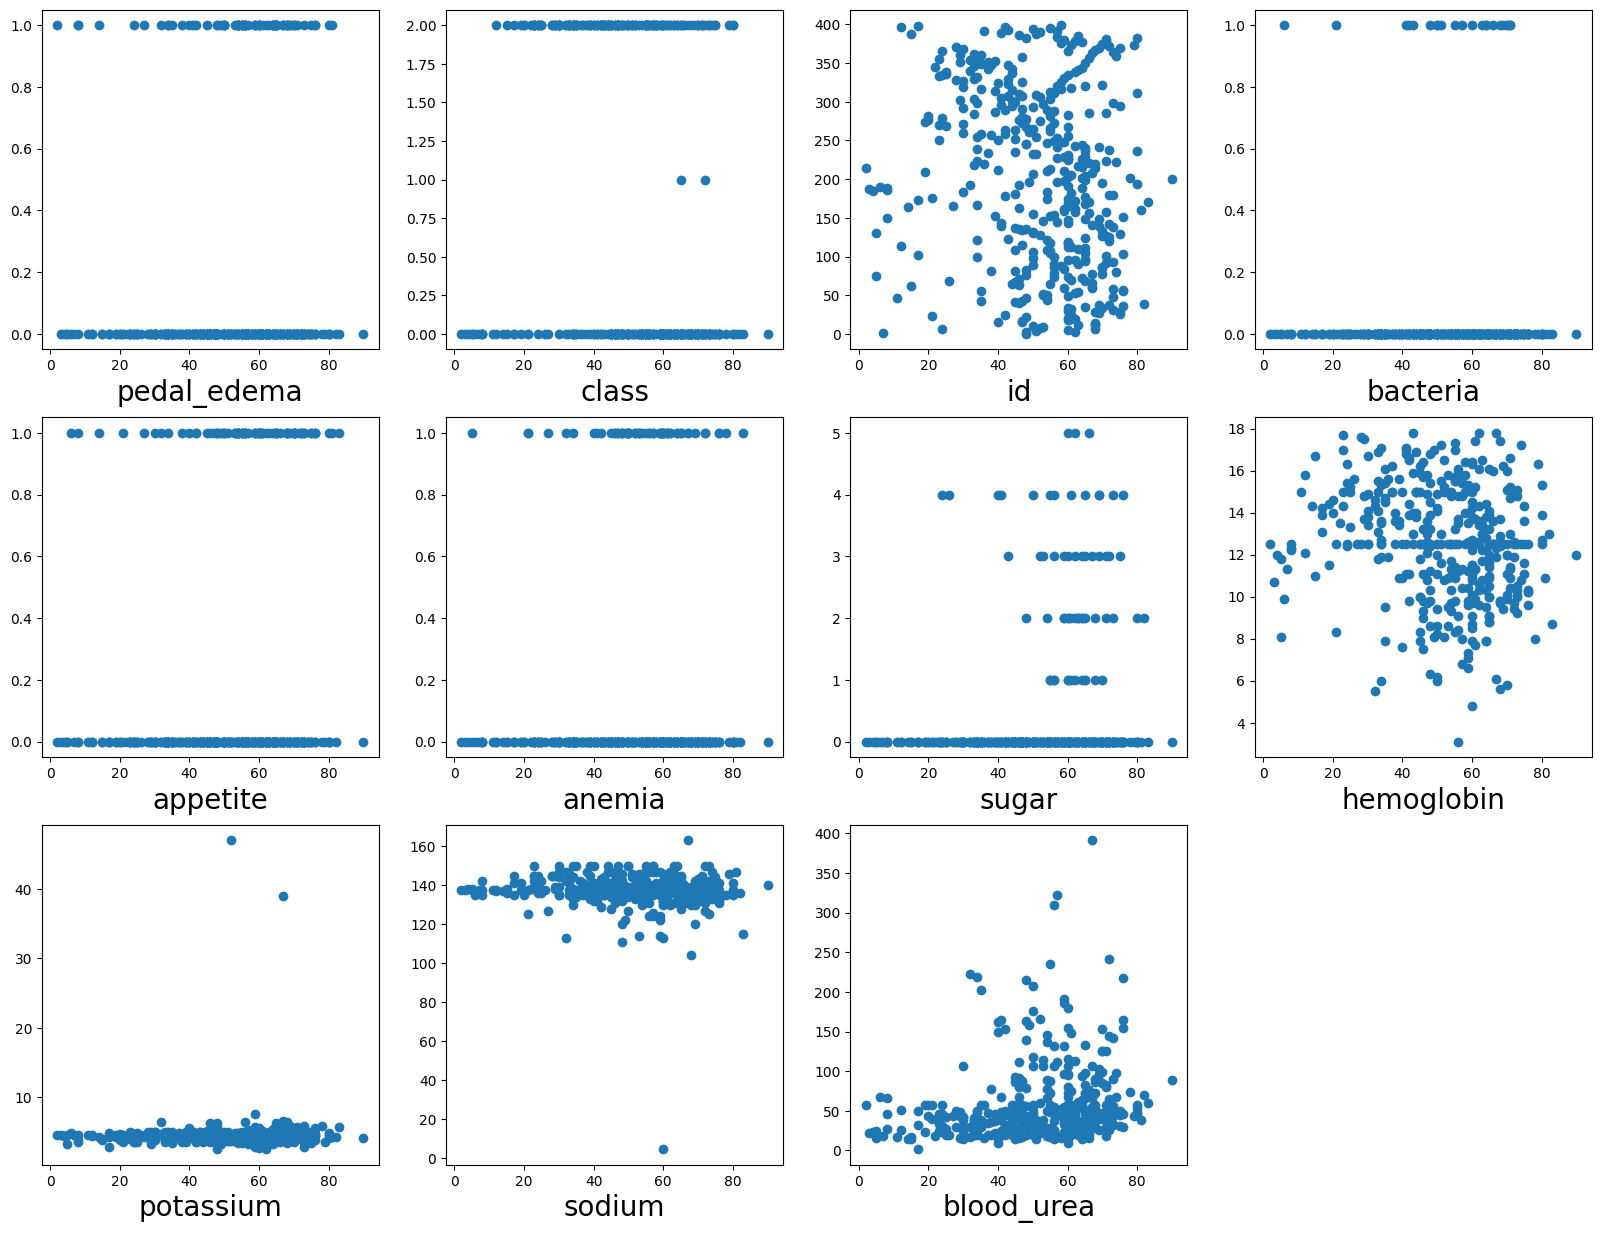

In [23]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber = 1

for column in contcols:
  if plotnumber<=11:
    ax = plt.subplot(3,4,plotnumber)
    plt.scatter(data['age'],data[column])
    plt.xlabel(column,fontsize=20)
    #plt.ylabel('Salary',fontsize=20)
  plotnumber+=1
plt.show    

Finding correlation between the independent Columns

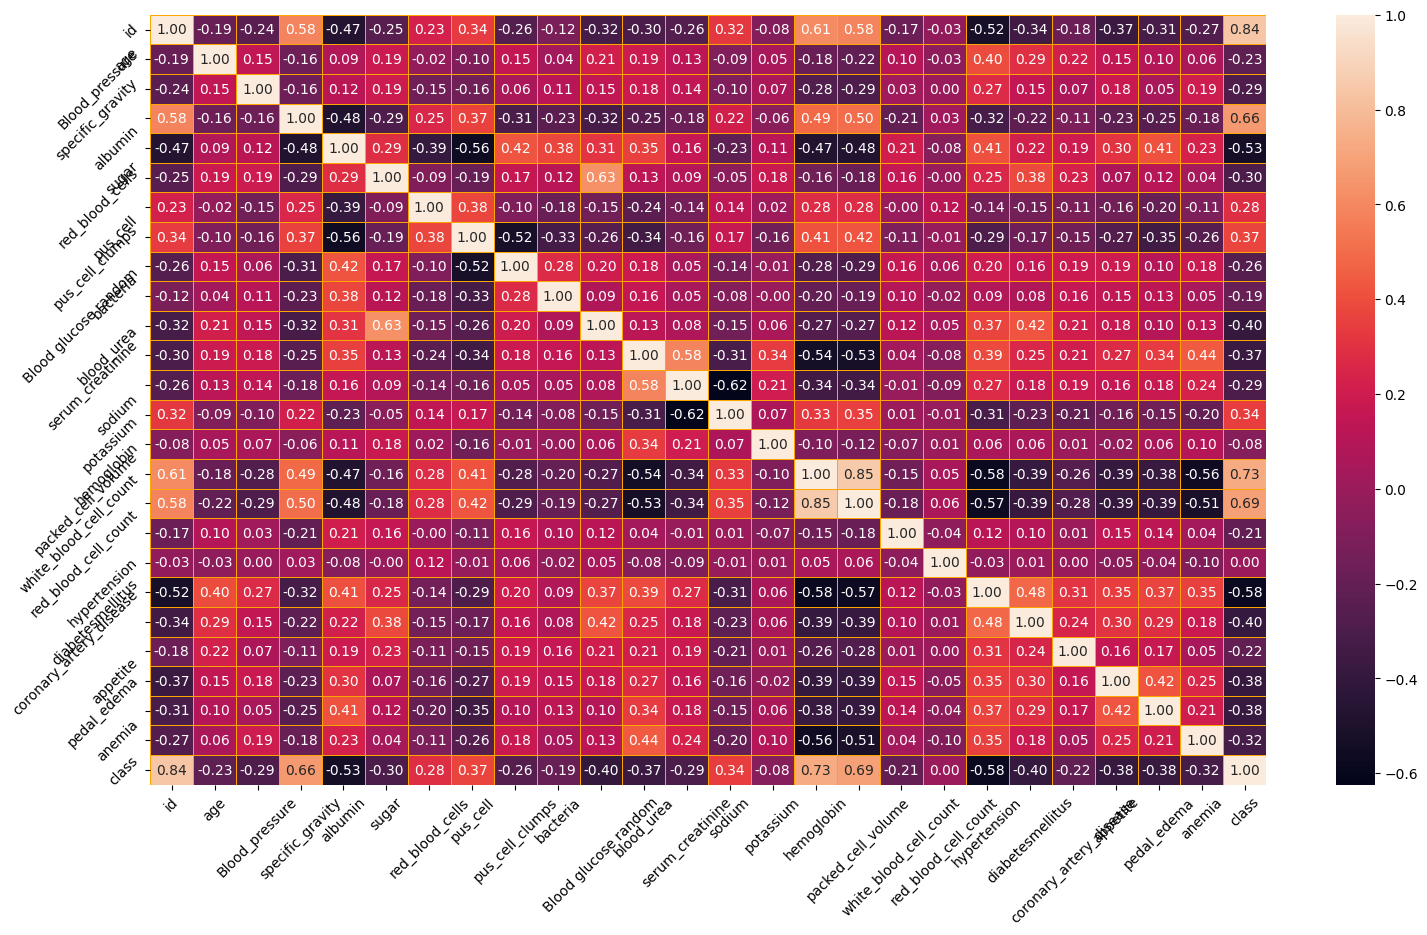

In [24]:
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

<Axes: ylabel='count'>

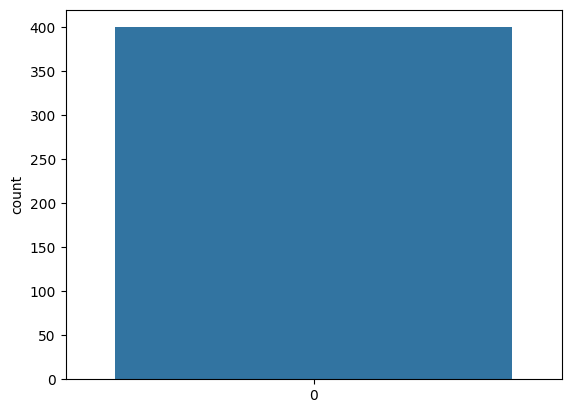

In [25]:
sns.countplot(data['class'])

Creating Independent and Dependent

In [26]:
selcols=['red_blood_cells','pus_cell','blood glucose random','blood_urea','pedal_edema','anemia','diabetesmellitus','coronary_artery_disease']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Splitting the data into train and test

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [30]:
classification = Sequential()
classification.add(Dense(30,activation='relu'))
classification.add(Dense(128,activation='relu'))
classification.add(Dense(64,activation='relu'))
classification.add(Dense(32,activation='relu'))
classification.add(Dense(1,activation='sigmoid'))




In [31]:
from sklearn import metrics
classification.compile(optimizer='adam',loss='binary_crossentroy',metrics=['accuracy'])

In [32]:
# # Training the model
# classification.fit(x_train,batch_size=10,validation_split=0.2,epochs=100)

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [34]:
x_train = np.nan_to_num(x_train)
x_test = np.nan_to_num(x_test)
y_train = np.nan_to_num(y_train)
y_test = np.nan_to_num(y_test)


In [35]:
rfc.fit(x_train,y_train)

<ipython-input-35-b87bb2ba9825>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10)

In [36]:
y_predict = rfc.predict(x_test)

In [37]:
y_predict_train = rfc.predict(x_train)

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc  = DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [39]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
y_predict= dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2])

In [41]:
y_predict_train = dtc.predict(x_train)

In [42]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Predicting our output with the model which we build

In [43]:
from sklearn.metrics import accuracy_score,classification_report
y_predict = lgr.predict(x_test)

In [44]:
# logistic Regression
y_pred = lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [45]:
# DecisionTree classifier
y_pred = dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [46]:
# Random Forest Classifier
y_pred - rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred)
(y_pred)

[2]


array([2])

In [47]:
# classification.save("ckd.h5")

In [48]:
#testing the model
y_pred = classification.predict(x_test)

3/3 [==============================] - 0s 4ms/step


In [49]:
y_pred

array([[0.6059748 ],
       [0.5551651 ],
       [0.6501118 ],
       [0.53497076],
       [0.56885135],
       [0.63761854],
       [0.58092654],
       [0.57301056],
       [0.56885135],
       [0.5648119 ],
       [0.7654023 ],
       [0.5836001 ],
       [0.5550672 ],
       [0.5909542 ],
       [0.73120284],
       [0.6881768 ],
       [0.8443382 ],
       [0.58355755],
       [0.5754832 ],
       [0.596274  ],
       [0.55590045],
       [0.58910877],
       [0.8207352 ],
       [0.59279656],
       [0.5571108 ],
       [0.5549948 ],
       [0.74328643],
       [0.63420033],
       [0.55589706],
       [0.58694   ],
       [0.6118555 ],
       [0.57334954],
       [0.56582826],
       [0.5554765 ],
       [0.54665154],
       [0.5539589 ],
       [0.5576681 ],
       [0.5526981 ],
       [0.5535381 ],
       [0.55395687],
       [0.64507735],
       [0.5576681 ],
       [0.523877  ],
       [0.5622899 ],
       [0.6998064 ],
       [0.56201714],
       [0.59092975],
       [0.554

In [50]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [51]:
def predict_exit(sample_value):
  # Covert list to numpy array
   sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
   sample_value = sample_value.reshape(1, -1)
  # Feature scaling
   sample_value = sc.transform(sample_value)

   return classifier.predict(sample_value)  

In [52]:
test=classification.predict([[1,1,121.000000,36.0,0,0,1,0]])
if test==1:
  print('Prediction: High chance of CKD!')
else:
  print('Prediction: Low chance of CKD.')
    

1/1 [==============================] - 0s 44ms/step
Prediction: Low chance of CKD.


Compare the model

In [53]:
from sklearn import model_selection

In [54]:
dfs = []
models = [
    ('LogReg', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier())
        ]
results = []
names = []
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted','roc_auc']
target_names = ['NO CKD','CKD']
for name, model in models:
  kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
  cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
  clf = model.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(name)
  # print(classification_report(y_test, y_pred, target_names=target_names))
  results.append(cv_results)
  names.append(name)
  this_df = pd.DataFrame(cv_results)
  this_df['model'] = name
  dfs.append(this_df)
final = pd.concat(dfs, ignore_index=True)
               


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent cal

LogReg


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RandomForestClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

RF
DecisionTree


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 76, in _cached_call
    return cache[method]
KeyError: 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 373, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_scorer.py", line 78, in _cached_call
    result = getattr(estimator, method)(*args, **kwargs)
AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

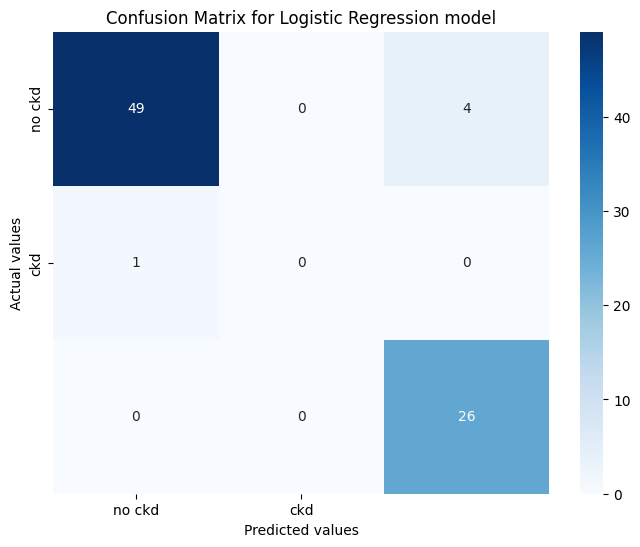

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

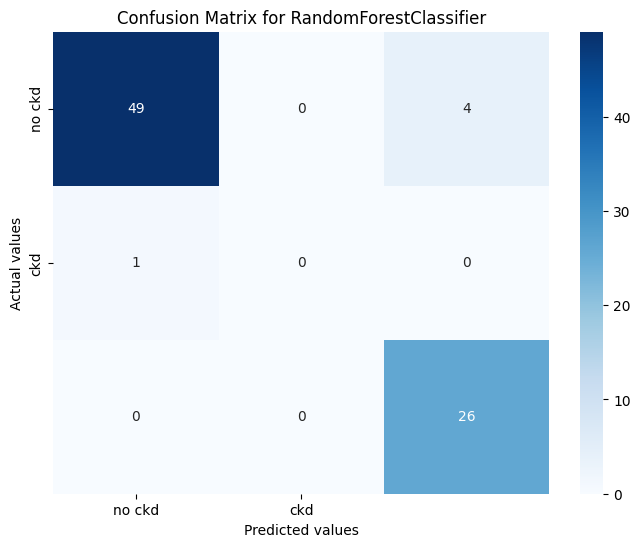

In [58]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd','ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[49,  0,  4],
       [ 1,  0,  0],
       [ 0,  0, 26]])

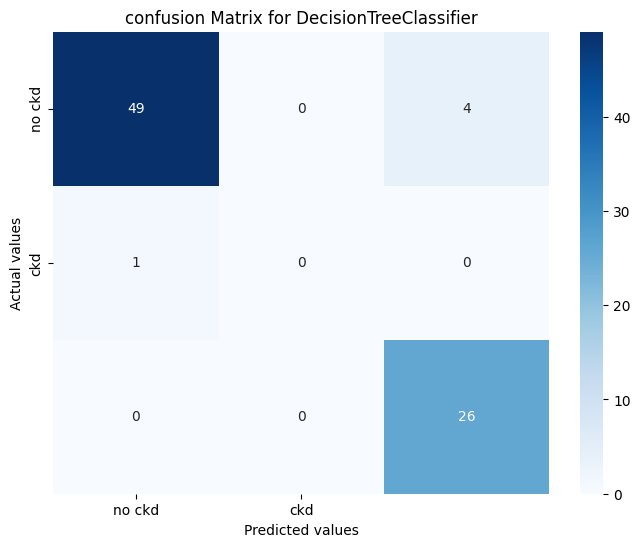

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion Matrix for DecisionTreeClassifier')
plt.show()

In [61]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.00      0.00      0.00         1
           2       0.89      0.92      0.91        26

    accuracy                           0.93        80
   macro avg       0.61      0.62      0.62        80
weighted avg       0.91      0.93      0.92        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[50,  0,  3],
       [ 1,  0,  0],
       [ 2,  0, 24]])

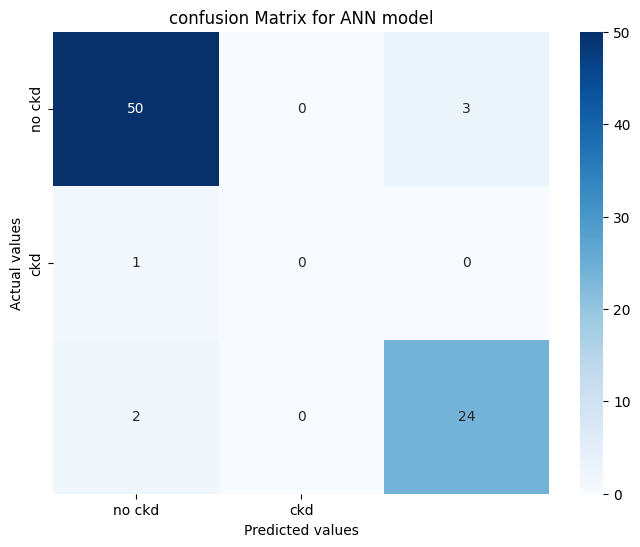

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('confusion Matrix for ANN model')
plt.show()

In [64]:
bootstraps = []
for model in list(set(final.model.values)):
  model_df = final.loc[final.model == model] 
  bootstrap = model_df.sample(n=30, replace=True)
  bootstraps.append(bootstrap)
  bootstrap_df = pd.concat(bootstraps, ignore_index=True)
  results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics',value_name='values')
  time_metrics = ['fit_time','score_time']
  results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]
  reults_long_nofit = results_long_nofit.sort_values(by='values')
  results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]
  results_long_fit = results_long_fit.sort_values(by='values')

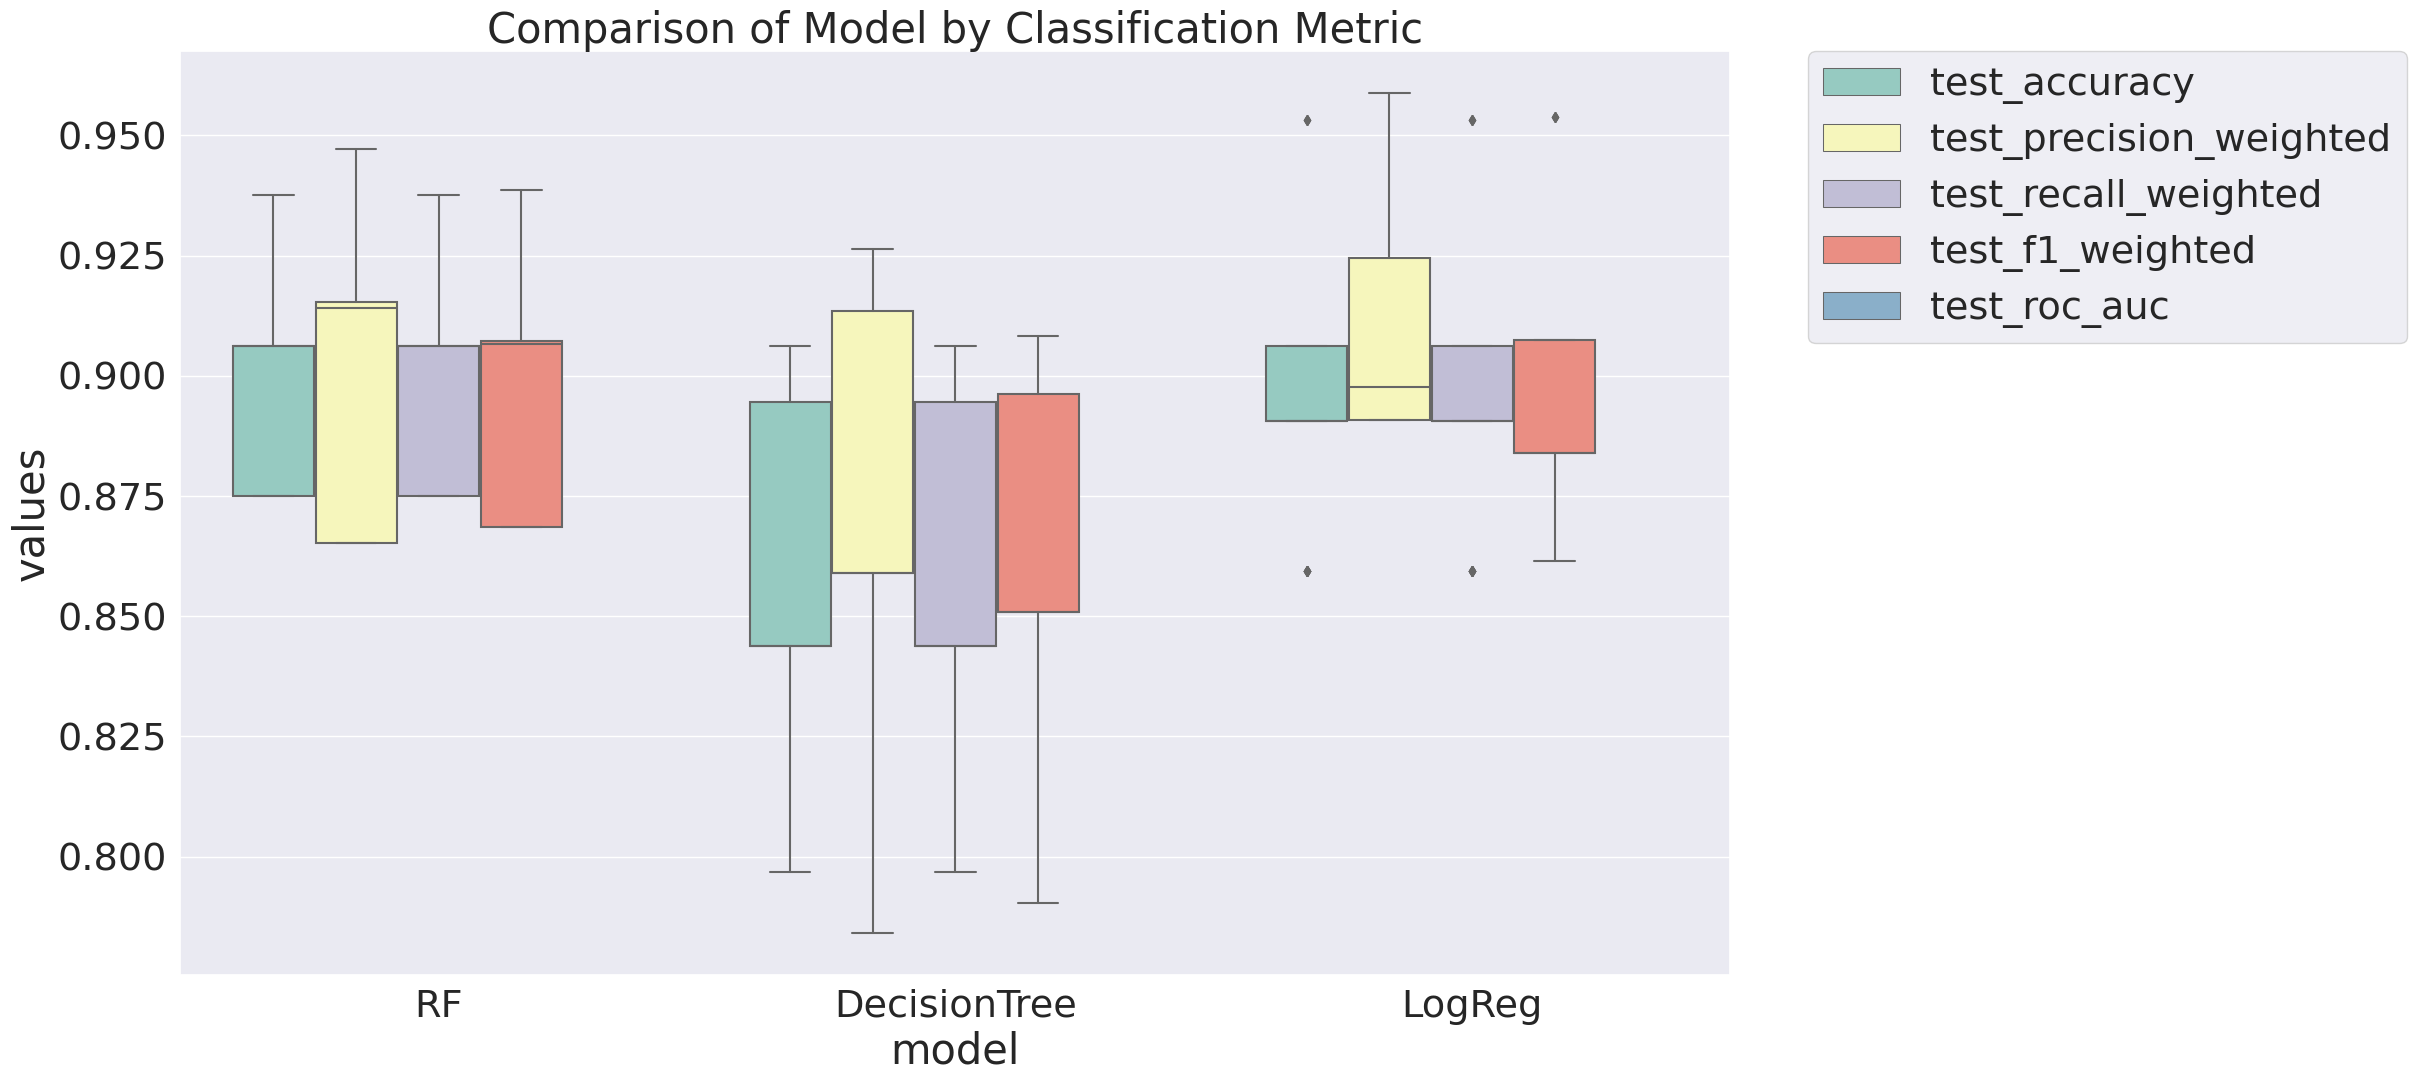

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

In [66]:
pickle.dump(lgr, open('CKD.pkl','wb'))

In [67]:
from flask import Flask, render_template, request
import numpy as np
import pickle

In [68]:
app = Flask(__name__)
model = pickle.load(open('CKD.pkl', 'rb'))